--------------------------------------------
# Aggregating 2018-2021 LTSA Data (MBARI)
--------------------------------------------

Artash Nath

--------------------------------------------

In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.ticker as plticker

In [2]:
# 
DATA_DIR = '/Downloaded Spectral Data' # Dir where daily LTSA files are stored

files = os.listdir(DATA_DIR)
file_paths = [os.path.join(DATA_DIR, i) for i in files]

dates = [i[:-4] for i in files]
dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
spectral_data_idv = []

for path in tqdm(file_paths):
    data = np.load(path)
    spectral_data_idv.append(data)


  0%|          | 0/1363 [00:00<?, ?it/s]

In [3]:
# Demo function to plot waterfall diagram for a given time period
def plot_time_period(t1,t2, size=(20,10),interval=10):
    
    d1 = dt.datetime.strptime(t1,'%Y-%m-%d').date()
    d2 = dt.datetime.strptime(t2,'%Y-%m-%d').date()
    
    i1 = dates.index(d1)
    i2 = dates.index(d2)
    
    datax = SPECTRAL_DATA[:, i1*1440:i2*1440]
    
    fig, ax = plt.subplots(figsize=size)
    
    im = ax.imshow(datax,aspect='auto',origin='lower',vmin=30,vmax=100, extent=[mdates.date2num(dates[i1]), mdates.date2num(dates[i2]), 0, 1000])
    ax.set_yscale('log')
    ax.set_ylim(10,1000)
    fig.colorbar(im)
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_title('Calibrated spectrum levels')
    
    date_format = mdates.AutoDateFormatter(interval)
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis_date()
    fig.autofmt_xdate()
    plt.show()

In [4]:
# Concatenate all daily LTSAs
SPECTRAL_DATA = np.concatenate(spectral_data_idv, axis=-1)

In [5]:
# Save all-time LTSA locally
np.save('MBARI_2018-2021_Spectral_Data.npy', SPECTRAL_DATA)

In [6]:
# Save time-range of LTSA locally
np.save('MBARI_2018-2021_Dates.npy', dates)

Text(0.5, 1.0, 'Calibrated spectrum levels')

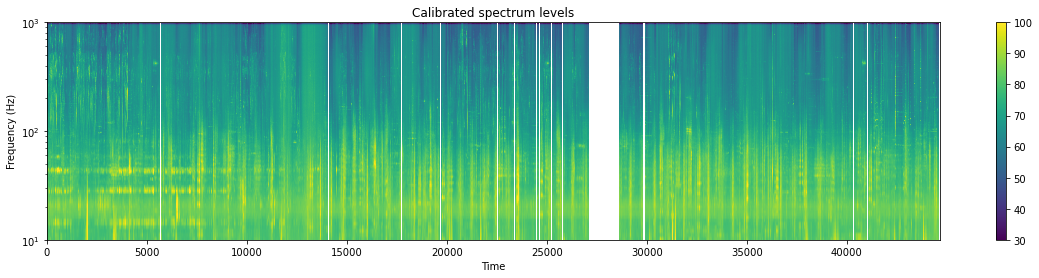

In [8]:
# Sample LTSA waterfall diagram

plt.figure(figsize=(20,4))
im = plt.imshow(SPECTRAL_DATA[:,:1440*31],aspect='auto',origin='lower',vmin=30,vmax=100)
plt.yscale('log')
plt.ylim(10,1000)
plt.colorbar(im)
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.title('Calibrated spectrum levels')

ERROR! Session/line number was not unique in database. History logging moved to new session 5376


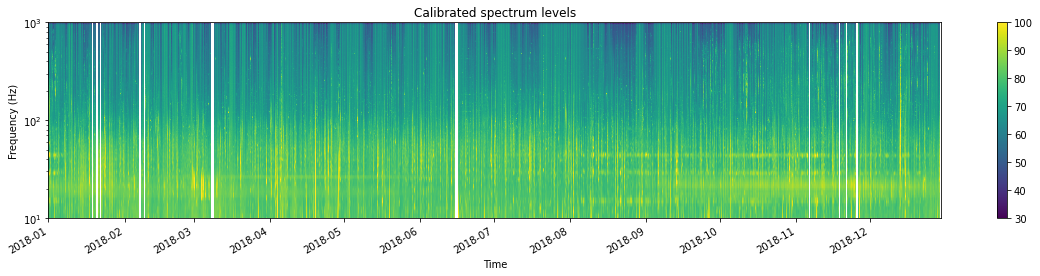

In [9]:
# Sample LTSA for a year of data
plot_time_period('2018-01-1', '2018-12-30', size=(20,4), interval=5)

# Raw Simple Analysis / Visualization of Trends at different Frequencies

In [10]:
def frequency_timeperiod(t1,t2,f1,f2, size=(20,10),interval=10):
    
    d1 = dt.datetime.strptime(t1,'%Y-%m-%d').date()
    d2 = dt.datetime.strptime(t2,'%Y-%m-%d').date()
    
    i1 = dates.index(d1)
    i2 = dates.index(d2)
    
    datax = np.mean(SPECTRAL_DATA[f1:f2, i1*1440:i2*1440], axis=0)
    fig, ax = plt.subplots(figsize=size)
    
    ax.plot(datax)#, extent=[mdates.date2num(dates[i1]), mdates.date2num(dates[i2]), 0, 1000])
    #ax.set_xlim([mdates.date2num(dates[i1]), mdates.date2num(dates[i2])])
    ax.set_xlabel('Time')
    ax.set_ylabel('Volume (Db)')
    ax.set_title('{} to {} ({}Hz - {}Hz)'.format(t1,t2,f1,f2))
    
    date_format = mdates.AutoDateFormatter(interval)
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis_date()
    fig.autofmt_xdate()
    plt.show()

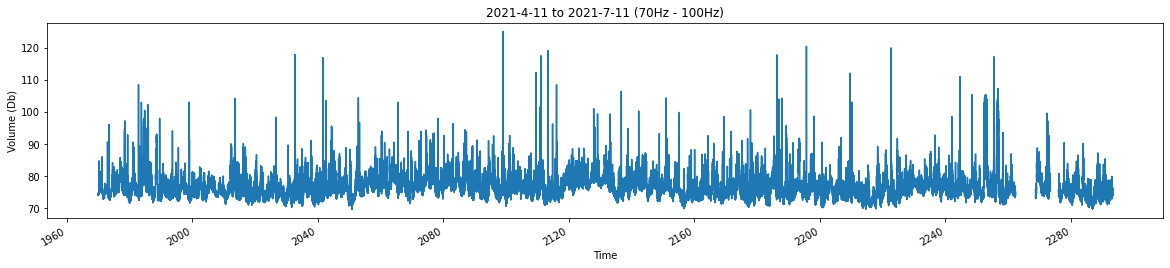

In [18]:
frequency_timeperiod('2021-4-11', '2021-7-11', 70, 100, size=(20,4), interval=5)

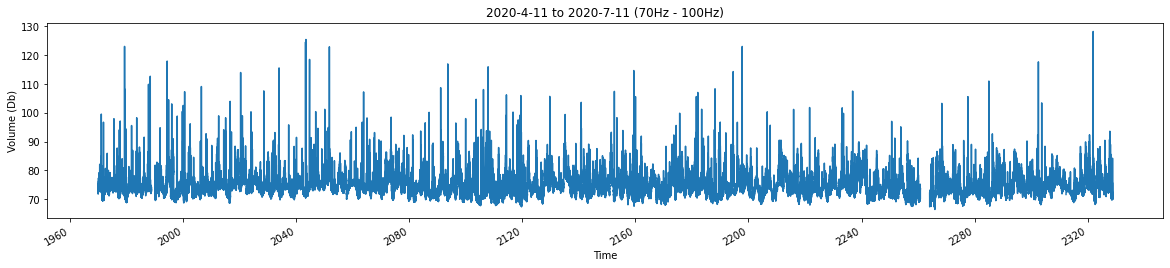

In [17]:
frequency_timeperiod('2020-4-11', '2020-7-11', 70, 100, size=(20,4), interval=5)